In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from pathlib import Path 

#IMGDIR = Path('C:\\Users\\evgenii.fedorov\\Documents\\opencv-drafts\\sampleData')
IMGDIR = Path('./sampleData')

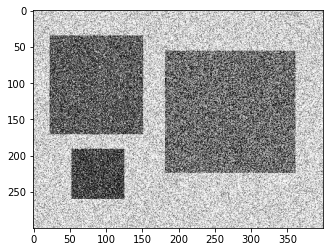

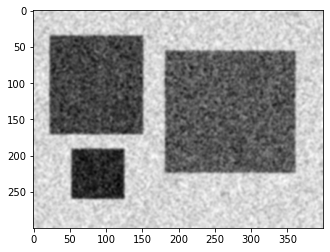

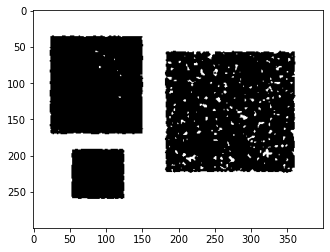

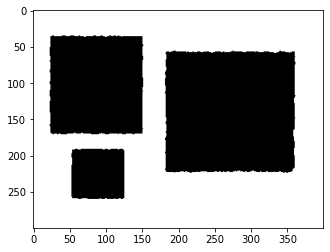

In [4]:
im = cv2.imread(str(IMGDIR/'pic2.png'))
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')
plt.show()

im = cv2.GaussianBlur(im, (7, 7), 0)
plt.imshow(im, cmap='gray')
plt.show()

ret, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
plt.imshow(im, cmap='gray')
plt.show()

# im = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations=1)
# plt.imshow(im, cmap='gray')
# plt.show()

im = cv2.morphologyEx(im, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)), iterations=1)
plt.imshow(im, cmap='gray')
plt.show()


In [5]:
def drawCont(img, conts, idx):
    stage = np.zeros(im.shape)
    cv2.drawContours(stage, conts, idx, 255, -1)
    plt.imshow(stage)
    
    return stage

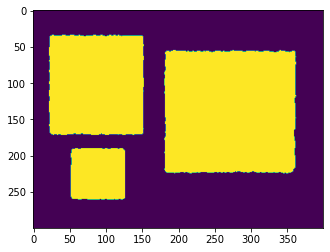

In [6]:
conts, hier = cv2.findContours(im, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
conts = sorted(conts, key=cv2.contourArea, reverse= True)[1:]

stage = drawCont(im, conts, -1)

Contour #0: aspect_ratio  1.07, extent  0.96
Contour #1: aspect_ratio  0.95, extent  0.96
Contour #2: aspect_ratio  1.06, extent  0.96


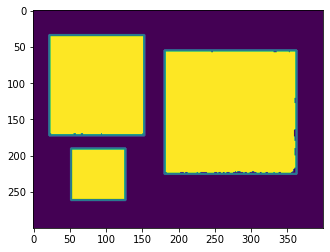

In [118]:
for i, cnt in enumerate(conts):
    x, y, w, h = cv2.boundingRect(cnt)
    stage = cv2.rectangle(stage, (x,y), (x+w,y+h), (105, 20, 20), 2)
    print(f'Contour #{i}: aspect_ratio {w/h: 4.2f}, extent {cv2.contourArea(cnt)/(w*h): 4.2f}')
plt.imshow(stage)